Students Study (Random Forest(Vijay Ragavan G))

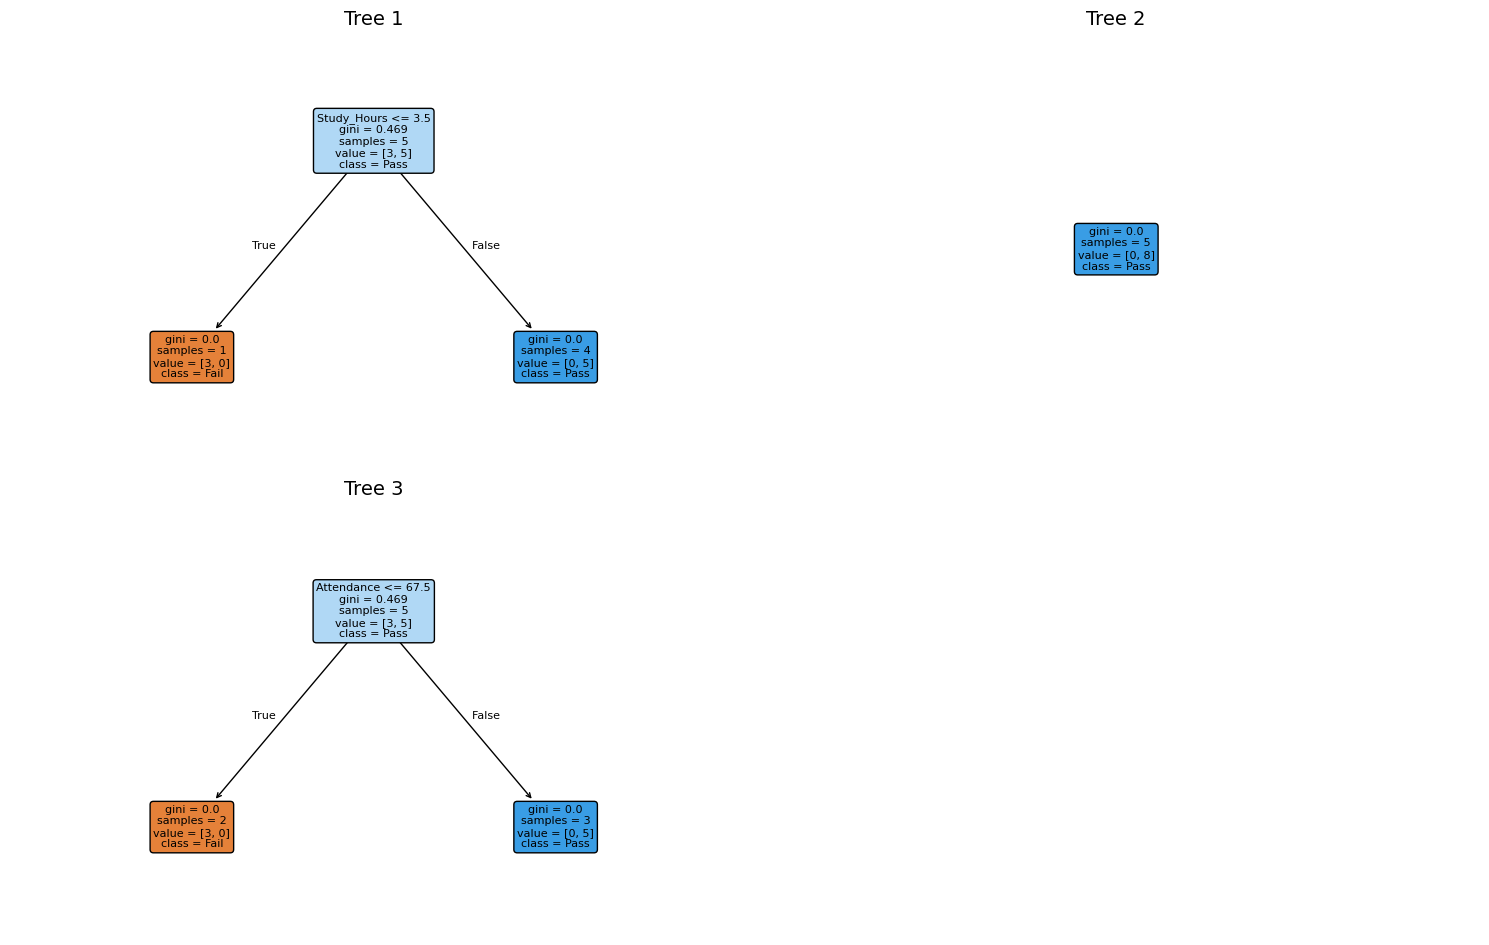

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/panda/student_pass_fail.csv')
# Encode the categorical target variable 'Result'
le = LabelEncoder()
df['Result_Encoded'] = le.fit_transform(df['Result'])
# Define Features (X) and Target (y)
X = df[['Study_Hours', 'Attendance', 'Previous_Marks']]
y = df['Result_Encoded']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
first_five_trees = rf_model.estimators_[:3]
feature_names = X.columns.tolist()
# le.classes_ are ['Fail', 'Pass']
class_names = [str(c) for c in le.classes_]
plt.figure(figsize=(15, 15)) # Compact figure size
# Iterate through the first 5 trees
for i, tree in enumerate(first_five_trees):
    # Use 3 rows, 2 columns (a 3x2 grid), plot index is i+1
    plt.subplot(3, 2, i + 1)
    plot_tree(
        tree,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=8, # Readable font size
        ax=plt.gca()
    )
    plt.title(f"Tree {i+1}", fontsize=14)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.savefig("first_five_rf_student_trees_compact.png")
# plt.show() # Uncomment this line to display the plot interactively